# **Preloaded data in Keras**

> In Keras the MNIST dataset is preloaded in the form of four Numpy arrays and can be obtained with the following code:

In [1]:
import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


> x_train and y_train contain the training set, while x_test and y_test contain 
the test data. The images are encoded as Numpy arrays and their corresponding labels ranging from 0 to 9. Following the strategy of the post to gradually introduce the concepts of the subject, as we have indicated, we will not see yet how to separate a part of the training data to use them as Validation data. We will only take into account the training and test data.
If we want to check what values we have loaded, we can choose any of the images of the MNIST set, for example image 8, and using the following Python code:

4


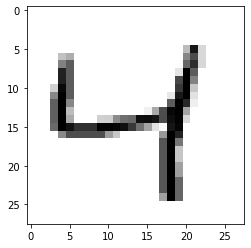

In [3]:
plt.imshow(x_train[2], cmap=plt.cm.binary)
print(y_train[2])

# **Data representation in Keras**

> Keras, which as we have seen uses a multidimensional array of Numpy as a basic data structure, calls this data structure a tensor. In short, we could say that a tensor has three main attributes:

  > - ***Number of axes (Rank):*** a tensor containing a single number will be called scalar (or a 0-dimensional tensor, or tensor 0D). An array of numbers we call vector, or tensor 1D. An array of vectors will be a matrix, or 2D tensor. If we pack this matrix in a new array, we get a 3D tensor, which we can interpret visually as a cube of numbers. By packaging a 3D tensioner in an array, we can create a 4D tensioner, and so on. In the Python Numpy library this is called the tensor’s ndim.

 > - ***Shape:*** it is a tuple of integers that describe how many dimensions the tensor has along each axis. In the Numpy library this attribute is called shape.

 > - ***Data type:*** this attribute indicates the type of data that contains the tensor, which can be for example uint8, float32, float64, etc. In the Numpy library this attribute is called dtype.

In [4]:
print(x_train.ndim)
print(x_train.shape)
print(x_train.dtype)

3
(60000, 28, 28)
uint8


# **Data normalization in Keras**


> These MNIST images of 28×28 pixels are represented as an array of numbers whose values range from [0, 255] of type uint8. But it is usual to scale the input values of neural networks to certain ranges. In the example of this post the input values should be scaled to values of type float32 within the interval [0, 1]. We can achieve this transformation with the following lines of code:

In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

# **Converting 2D Tensor to 1D Vector**

> On the other hand, to facilitate the entry of data into our neural network (we will see that in convolutionals it is not necessary) we must make a transformation of the tensor (image) from 2 dimensions (2D) to a vector of 1 dimension (1D). That is, the matrix of 28×28 numbers can be represented by a vector (array) of 784 numbers (concatenating row by row), which is the format that accepts as input a densely connected neural network like the one we will see in this post. In Python, converting every image of the MNIST dataset to avector with 784 components can be accomplished as follows:

In [0]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

> After executing these Python instructions, we can verify that x_train.shape takes the form of (60000, 784) and x_test.shape takes the form of (10000, 784), where the first dimension indexes the image and the second indexes the pixel in each image (now the intensity of the pixel is a value between 0 and 1):

In [7]:
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


> In addition to that, we have the labels for each input data (remember that in our case they are numbers between 0 and 9 that indicate which digit represents the image, that is, to which class is associated). In this example, and as we have already advanced, we will represent this label with a vector of 10 positions, where the position corresponding to the digit that represents the image contains a 1 and the remaining positions of the vector contain the value 0.

> In this example we will use what is known as one-hot encoding, which we have already mentioned, which consists of transforming the labels into a vector of as many zeros as the number of different labels, and containing the value of 1 in the index that corresponds to the value of the label. Keras offers many support functions, including to_categorical to perform precisely this transformation, which we can import from keras.utils:

In [0]:
from keras.utils import to_categorical

> To see the effect of the transformation we can see the values before and after applying to_categorical :

In [9]:
print('Y Train:', y_train[0])
print('Y Test:', y_test[0])

print('\nY Train Shape:', y_train.shape)
print('X Test Shape:', x_test.shape)

Y Train: 5
Y Test: 7

Y Train Shape: (60000,)
X Test Shape: (10000, 784)


In [0]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [11]:
print('Y Train:', y_train[0])
print('Y Test:', y_test[0])

print('Y Train Shape:', y_train.shape)
print('Y Test Shape:', y_test.shape)

Y Train: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Y Test: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Y Train Shape: (60000, 10)
Y Test Shape: (10000, 10)


# **Densely connected networks in Keras**

> In this section, we will present how to specify in Keras the model that we have defined in the previous sections.

**Sequential class in Keras**

> The main data structure in Keras is the Sequential class, which allows the creation of a basic neural network. Keras also offers an API that allows implementing more complex models in the form of a graph that can have multiple inputs, multiple outputs, with arbitrary connections in between, but it is beyond the scope of this post.
The Sequential class of the Keras library is a wrapper for the sequential neural network model that Keras offers and can be created in the following way:

In [0]:
from keras.models import Sequential
model = Sequential()

> In this case, the model in Keras is considered as a sequence of layers and each of them gradually “distills” the input data to obtain the desired output. In Keras we can find all the required types of layers that can be easily added to the model through the add() method.

# **Defining the model**

The construction in Keras of our model to recognize the images of digits could be the following:

In [0]:
from keras.layers.core import Dense, Activation

model.add(Dense(10, activation='sigmoid', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

> Here, the neural network has been defined as a sequence of two layers that are densely connected (or fully connected), meaning that all the neurons in each layer are connected to all the neurons in the next layer. Visually we could represent it in the following way:




![alt text](https://miro.medium.com/max/1400/1*c0fsl5kacv8nEwdIpji4bw.png)


> In the previous code we explicitly express in the input_shape argument of the first layer what the input data is like: a tensor that indicates that we have 784 features of the model (in fact the tensor that is being defined is (None, 784,) as we will see more ahead).

> A very interesting characteristic of the Keras library is that it will automatically deduce the shape of the tensors between layers after the first one. This means that the programmer only has to establish this information for the first of them. Also, for each layer we indicate the number of nodes that it has and the activation function that we will apply in it (in this example, sigmoid).

> The second layer in this example is a softmax layer of 10 neurons, which means that it will return a matrix of 10 probability values representing the 10 possible digits (in general, the output layer of a classification network will have as many neurons as classes, except in a binary classification, where only one neuron is needed). Each value will be the probability that the image of the current digit belongs to each one of them.

A very useful method that Keras provides to check the architecture of our model is summary():

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


> For our simple example, we see that it indicates that 7,960 parameters are required (column Param #), which correspond to 7,850 parameters to the first layer and 110 to the second.

> In the first layer, for each neuron i (between 0 and 9) we require 784 parameters for the weights wij and therefore 10×784 parameters to store the weights of the 10 neurons. In addition to the 10 additional parameters for the 10 bj biases corresponding to each one of them. In the second layer, being a softmax function, it is required to connect all 10 neurons with the 10 neurons of the previous layer. Therefore 10x10 wi parameters are required and in addition 10 bj biases corresponding to each node.

> The details of the arguments that we can indicate for the Dense layer can be found in the Keras manual. In our example, the most relevant ones appear. The first argument indicates the number of neurons in the layer; the following is the activation function that we will use in it. 

> The initialization of the weights is also often indicated as an argument of the Dense layers. The initial values must be adequate for the optimization problem to converge as quickly as possible. The various initialization options can also be found in the Keras manual.
Basic steps to implement a neural network in Keras
Next, we will present a brief description of the steps we must perform to implement a basic neural network and, in the following posts (soon), we will gradually introduce more details about each of these steps.


# **Configuration of the learning process**

> From the Sequential model, we can define the layers in a simple way with the add() method, as we have advanced in the previous section. Once we have our model defined, we can configure how its learning process will be with the compile() method, with which we can specify some properties through method arguments.

> The first of these arguments is the loss function that we will use to evaluate the degree of error between calculated outputs and the desired outputs of the training data. On the other hand, we specify an optimizer that, as we will see, is the way we have to specify the optimization algorithm that allows the neural network to calculate the weights of the parameters from the input data and the defined loss function. 

> And finally we must indicate the metric that we will use to monitor the learning process (and test) of our neural network. In this first example we will only consider the accuracy (fraction of images that are correctly classified). For example, in our case we can specify the following arguments in compile() method to test it on our computer:

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics = ['accuracy'])

> In this example we specify that the loss function is categorical_crossentropy, the optimizer used is the stocastic gradient descent (sgd) and the metric is accuracy, with which we will evaluate the percentage of correct guesses.

# **Model training**

Once our model has been defined and the learning method configured, it is ready to be trained. For this we can train or “adjust” the model to the training data available by invoking the fit() method of the model:

In [21]:
model.fit(x_train, y_train, batch_size=200, epochs=20)

Epoch 1/20
60000/60000 [==============================] - 1s 11us/step - loss: 1.1791 - accuracy: 0.7530
Epoch 2/20
60000/60000 [==============================] - 1s 11us/step - loss: 1.1225 - accuracy: 0.7640
Epoch 3/20
60000/60000 [==============================] - 1s 11us/step - loss: 1.0718 - accuracy: 0.7733
Epoch 4/20
60000/60000 [==============================] - 1s 11us/step - loss: 1.0262 - accuracy: 0.7817
Epoch 5/20
60000/60000 [==============================] - 1s 11us/step - loss: 0.9850 - accuracy: 0.7882
Epoch 6/20
60000/60000 [==============================] - 1s 11us/step - loss: 0.9477 - accuracy: 0.7949
Epoch 7/20
60000/60000 [==============================] - 1s 12us/step - loss: 0.9139 - accuracy: 0.8014
Epoch 8/20
60000/60000 [==============================] - 1s 12us/step - loss: 0.8830 - accuracy: 0.8066
Epoch 9/20
60000/60000 [==============================] - 1s 11us/step - loss: 0.8546 - accuracy: 0.8116
Epoch 10/20
60000/60000 [==============================

> In the first two arguments we have indicated the data with which we will train the model in the form of Numpy arrays. The batch_size argument indicates the number of data that we will use for each update of the model parameters and with epochs we are indicating the number of times we will use all the data in the learning process. 

> This method finds the value of the parameters of the network through the iterative training algorithm that we mentioned. Roughly, in each iteration of this algorithm, training data from x_train, passes through the neural network (with the values that their parameters have at that moment), compares the obtained result with the expected one (indicated in y_train) and calculates the loss to guide the adjustment process of the model parameters, which intuitively consists of applying the optimizer specified above in the compile() method to calculate a new value of each one of the model parameters (weights and biases)in each iteration in such a way that the loss is reduced.

> This is the method that, as we will see, may take longer and Keras allows us to see its progress using the verbose argument (by default, equal to 1), in addition to indicating an estimate of how long each epoch takes.

> The fit() method allows many more arguments that have a very important impact on the learning outcome. Furthermore, this method returns a History object that we have omitted in this example. Its History.history attribute is the record of the loss values for the training data and other metrics in successive epochs, as well as other metrics for the validation data if they have been specified.

# **Model evaluation**

> At this point, the neural network has been trained and its behavior with new test data can now be evaluated using the evaluation() method. This method returns two values:

In [22]:
test_loss, test_acc = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 22us/step


> These values indicate how well or badly our model behaves with new data that it has never seen. These data have been stored in x_test and y_test when we have performed the mnist.load_data() and we pass them to the method as arguments. In the scope of this post we will only look at one of them, the accuracy:

In [23]:
print('Test accuracy:', test_acc)

Test accuracy: 0.8572999835014343


# **Generate predictions**

> Finally, readers need to know how we can use the model trained in the previous section to make predictions. In our example, it consists in predict which digit represents an image. In order to do this, Keras supply the predict() method.

> To test this method we can choose any element. For ease, let’s take one from the test dataset x_test. For example let’s choose the element 11 of this dataset x_test.

> Before seeing the prediction, let’s see the image to be able to check ourselves if the model is making a correct prediction (before doing the previous reshape):

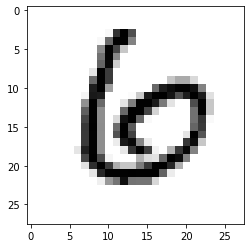

In [2]:
plt.imshow(x_test[11], cmap=plt.cm.binary)

> Now let’s see that the predict() method of the model, executing the following code, correctly predicts the value that we have just estimated that it should predict.

> The predict() method returns a vector with the predictions for the whole dataset elements. We can know which class gives the most probability of belonging by means of the argmax function of Numpy, which returns the index of the position that contains the highest value of the vector. Specifically, for item 11:

In [24]:
import numpy as np
predictions = model.predict(x_test)
np.argmax(predictions[11])

6

> We can check it printing the vector returned by the method:

In [25]:
print(predictions[11])

[0.22256902 0.0071131  0.10233448 0.01524724 0.10843305 0.0651271
 0.38677177 0.00573045 0.06087364 0.0258002 ]


> We see that the highest value in the vector is in the position 6. We can also verify that the result of the prediction is a vector whose sum of all its components is equal to 1, as expected. For this we can use:

In [26]:
np.sum(predictions[11])

1.0